In [ ]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826167 sha256=11c7dbdd5222528744cbda9318b3b823cc58fb3f1b1f2b7f2a4684a6b694289b
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.6.0
    Uninstalling pystan-3.6.0:
      Successfully uninstalled pystan-3.6.0


In [ ]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436782 sha256=2eecc58a3f7976fdbc535ca0a299b29d1752c39e7767de87cea62016dad64863
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988bdaa
Successfully built fbprophet


In [ ]:
!pip install NeuralProphet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
import numpy as np
import pandas as pd 
import random as rd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns 
from fbprophet import Prophet

In [125]:
df = pd.read_csv("google-data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [127]:
df['date'] = pd.to_datetime(df['Date']).dt.strftime("%d/%m/%y")
df.drop(columns=["Date"], inplace =True)

In [128]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
0,357.385559,361.151062,355.959839,359.288177,359.288177,5115500,02/01/13
1,360.122742,363.600128,358.031342,359.496826,359.496826,4666500,03/01/13
2,362.313507,368.339294,361.488861,366.600616,366.600616,5562800,04/01/13
3,365.348755,367.301056,362.929504,365.001007,365.001007,3332900,07/01/13
4,365.393463,365.771027,359.874359,364.280701,364.280701,3373900,08/01/13


In [130]:
data = pd.date_range(start="2013-01-02", end='2017-12-29', freq='D')
data = pd.DataFrame({'date': data})
data['date'] = data['date'].dt.strftime("%d/%m/%y")
data = data.merge(df, on='date', how='left')

In [139]:
data.head(5)

,date,Open,High,Low,Close,Adj Close,Volume
0,02/01/13,357.385559,361.151062,355.959839,359.288177,359.288177,5.115500e+06
1,03/01/13,360.122742,363.600128,358.031342,359.496826,359.496826,4.666500e+06
2,04/01/13,362.313507,368.339294,361.488861,366.600616,366.600616,5.562800e+06
3,05/01/13,363.672264,370.177059,364.091857,369.244832,369.244832,5.329146e+06
4,06/01/13,364.524566,369.314551,364.813292,367.666599,367.666599,4.257799e+06


In [ ]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data[numeric_columns].interpolate(method='cubic', inplace=True)

In [140]:
data.head()

,date,Open,High,Low,Close,Adj Close,Volume
0,02/01/13,357.385559,361.151062,355.959839,359.288177,359.288177,5.115500e+06
1,03/01/13,360.122742,363.600128,358.031342,359.496826,359.496826,4.666500e+06
2,04/01/13,362.313507,368.339294,361.488861,366.600616,366.600616,5.562800e+06
3,05/01/13,363.672264,370.177059,364.091857,369.244832,369.244832,5.329146e+06
4,06/01/13,364.524566,369.314551,364.813292,367.666599,367.666599,4.257799e+06


In [135]:
a = sn.tsa.seasonal_decompose(data.Close.values, period = 365, model = "additive")

In [137]:
m = sn.tsa.seasonal_decompose(data.Close.values, period=65, model="multiplicative")

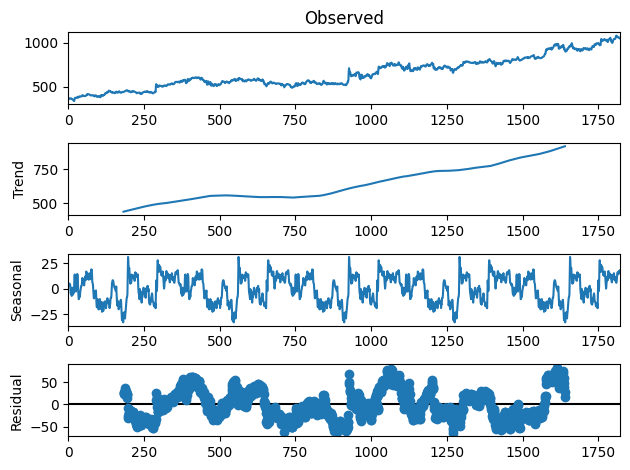

In [138]:
fig = a.plot()

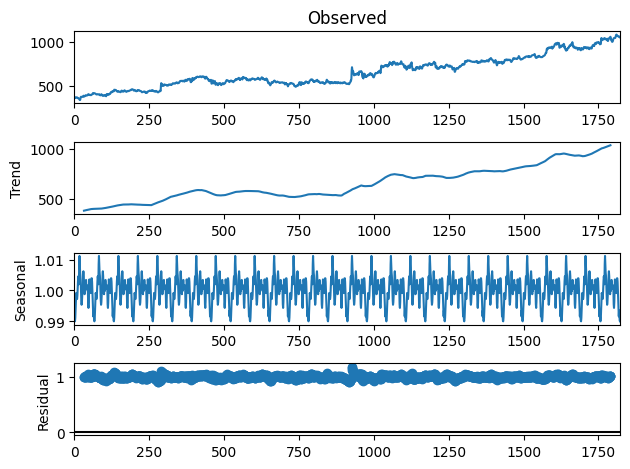

In [141]:
fig = m.plot()

In [142]:
def adf_check(timeseries):
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "P-Value", "LAGS USED", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
adf_check(data.Close)


Test Statistic                   -0.232731
P-Value                           0.934506
LAGS USED                         5.000000
Number of Observations Used    1817.000000
Critical Value (1%)              -3.433954
Critical Value (5%)              -2.863132
Critical Value (10%)             -2.567618
dtype: float64


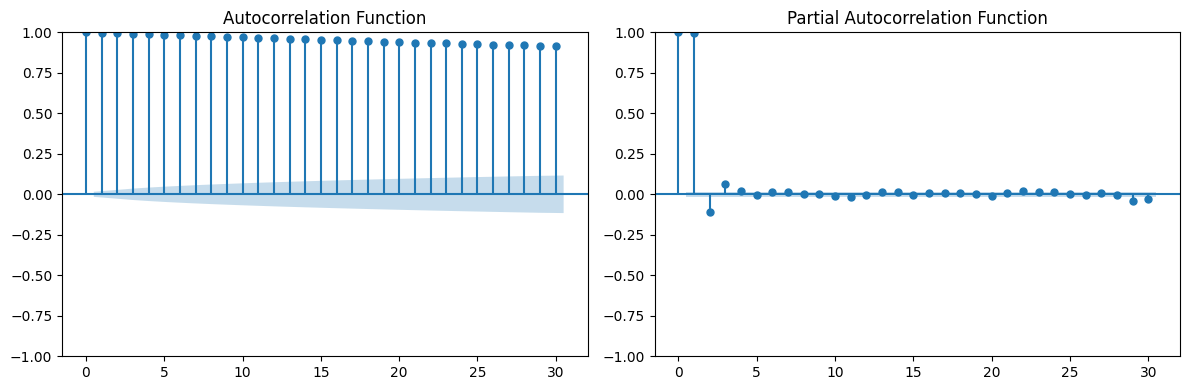

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

smt.graphics.plot_acf(data.Close, lags=30, ax=ax1, alpha=0.5)
smt.graphics.plot_pacf(data.Close, lags=30, ax=ax2, alpha=0.5)

ax1.set_title('Autocorrelation Function')
ax2.set_title('Partial Autocorrelation Function')

plt.tight_layout()


In [147]:
model_df = data[['date', 'Close']].rename(columns={'date': 'ds', 'Close': 'y'})

In [148]:
from fbprophet import Prophet
model = Prophet()
model.fit(model_df)
ft = model.make_future_dataframe(periods=365)
pred = model.predict(ft)
pred[["ds","yhat",'yhat_lower','yhat_upper']].tail()


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will 

,ds,yhat,yhat_lower,yhat_upper
2183,2018-12-25,1259.667269,1184.511213,1342.763760
2184,2018-12-26,1264.852183,1186.472757,1346.054588
2185,2018-12-27,1271.124013,1189.234763,1352.132748
2186,2018-12-28,1273.560297,1189.759394,1355.689738
2187,2018-12-29,1276.962384,1202.646010,1353.645537


Text(0.5, 1.0, 'Predicted Google Stock Prices (2013-01-02 to 2018-12-29)')

<Figure size 1600x800 with 0 Axes>

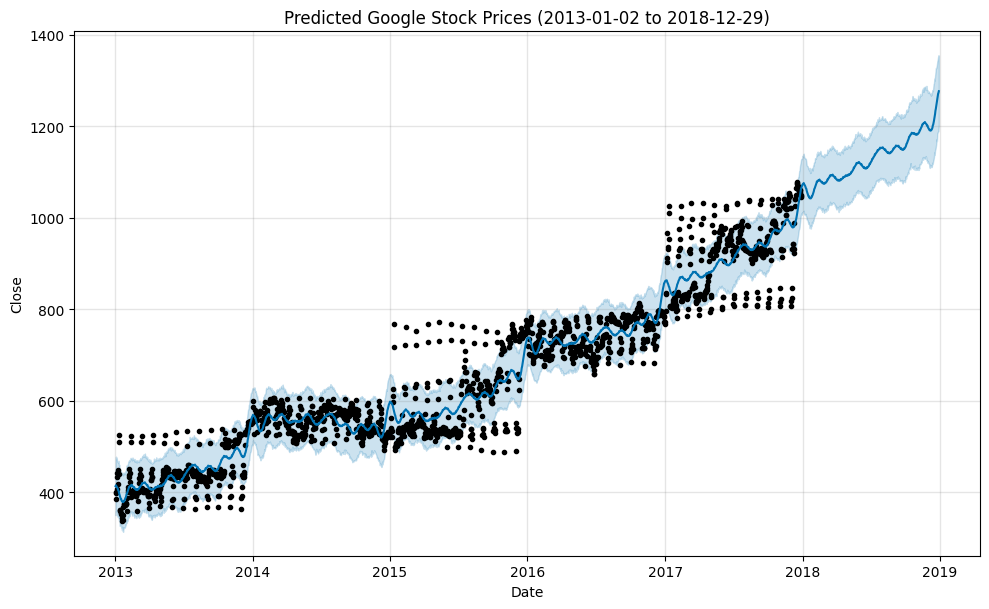

In [149]:
plt.figure(figsize=(16,8))
model.plot(pred)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title(f"Predicted Google Stock Prices ({pred.ds.min().date()} to {pred.ds.max().date()})")


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




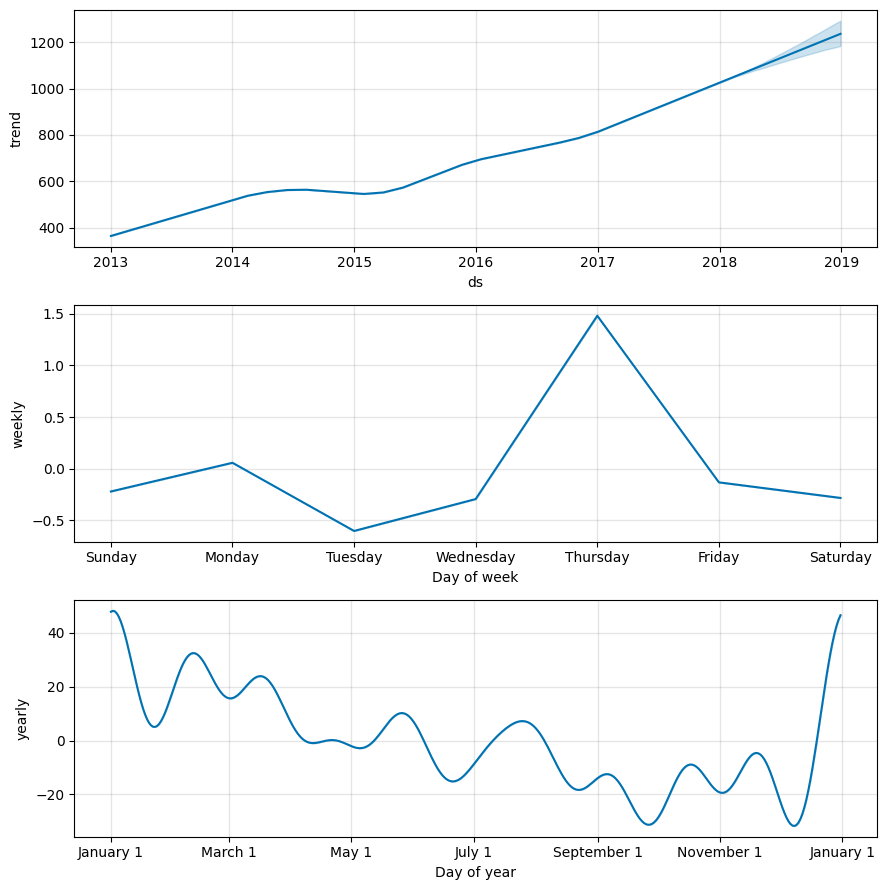

In [150]:
fig = model.plot_components(pred)